# K-mer filtering, 10/04/20

## Intro

### K-mer score distributions

Here we introduce the concept of a k-mer score distribution.
Let $x$ be a k-mer, $s_b^x$ be the corresponding score of $x$ for the branch $b$, retrieved from the database:

```python
branches = database[x];

if b in branches:
    log_score = branches[b];
else:
    log_score = database.threshold;
    
    
s_x_b = 10 ^ log_score;

```


Then $P_{x} = \{p_0^x, p_1^x, \dots p_n^x\}$ is the score distribution of the k-mer $x$, where $n$ is the number of internal branches of the phylogenetic tree, and

$p_i^x = \frac{s_i^x}{\sum_{j=0}^{n-1}{s_j^x} }$.


Simply saying, we look at the vector of normalized scores of branches for a fixed k-mer (thresholds included).



### Score filters

Score filtering algorithm:


1. For every k-mer $x$:
    1. Take the score distribution of a k-mer.
    2. Calculate the value $F(P_{x})$ of the filter function on the distribution
2. Calculate the threshold value $F_\mu$ of $F(P)$ such as the number of k-mers that have $F(P)$ values more than $F_\mu$ is not less than $\mu$.
3. Store $x$ in the database, if $F(P_x) >= F_\mu$.


Here we think about $\mu$ as the proportion of the "best" k-mers to keep, where what are best determined by the filter function. The tested filter functions are:
- entropy filter
- max deviation filter
- max difference filter


## Entropy filter

This is the classic Shannon entropy on discrete distributions:

$F(P_x) = - \sum_{i=0}^{n}{p_i^x \log(p_i^x)}$


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
workdir = "/home/nikolai/dev/datasets/d652/266_pruning/pewo_likelihood"
filename = f"{workdir}/summary_table_LL_rappas2.csv"
df_rappas = pd.read_csv(filename, sep=";")
df_rappas["software"] = "rappas"
df_rappas.head()

,length,k,o,red,ar,mu,likelihood,software
0,0,8,2,0.99,PHYML,0.1,-41742.744227,rappas
1,0,10,2,0.99,PHYML,0.1,-41736.298636,rappas
2,0,8,2,0.99,PHYML,0.3,-41737.022266,rappas
3,0,10,2,0.99,PHYML,0.3,-41735.894070,rappas
4,0,8,2,0.99,PHYML,0.5,-41735.962155,rappas


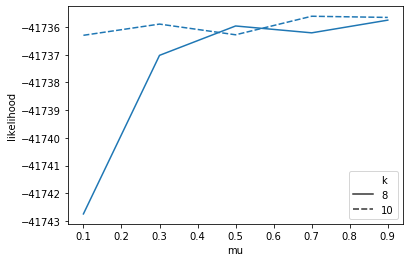

In [13]:
sns.lineplot(x="mu", y="likelihood", style="k", data=df_rappas)

In [14]:
filename = f"{workdir}/tables_LL_rappas2.csv"
tables_rappas = pd.read_csv(filename, sep=";")
tables_rappas["software"] = "rappas"
tables_rappas.head()

,pruning,red,ar,k,o,mu,query,length,likelihood,software
0,0,0.99,PHYML,10,2.0,0.1,113S1-4-r300-0-300,0,-41760.711894,rappas
1,0,0.99,PHYML,10,2.0,0.1,113S1-4-r300-300-600,0,-41667.159348,rappas
2,0,0.99,PHYML,10,2.0,0.1,113S1-4-r300-600-900,0,-41712.307100,rappas
3,0,0.99,PHYML,10,2.0,0.1,123B-13-F-r300-0-300,0,-41786.493945,rappas
4,0,0.99,PHYML,10,2.0,0.1,123B-13-F-r300-1200-1500,0,-41792.242213,rappas


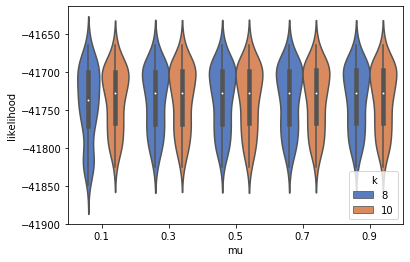

In [15]:
sns.violinplot(x="mu", y="likelihood", hue="k", data=tables_rappas, palette="muted")

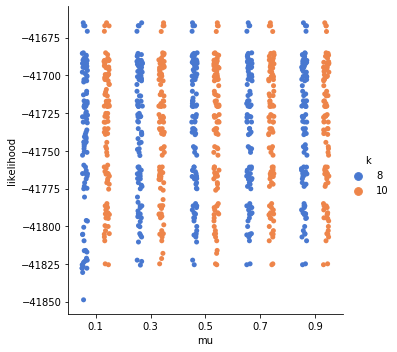

In [16]:
sns.catplot(x="mu", y="likelihood", dodge=True, hue="k", data=tables_rappas, palette="muted")

In [17]:
filename = f"{workdir}/summary_table_LL_epa.csv"
df_epa = pd.read_csv(filename, sep=";")
df_epa["software"] = "epa"
df_epa

,length,g,likelihood,software
0,0,0.01,-41734.707198,epa


In [18]:
filename = f"{workdir}/tables_LL_epa.csv"
tables_epa = pd.read_csv(filename, sep=";")
tables_epa["software"] = "epa"
tables_epa.head()

,pruning,g,query,length,likelihood,software
0,0,0.01,113S1-4-r300-0-300,0,-41760.711894,epa
1,0,0.01,113S1-4-r300-300-600,0,-41665.623969,epa
2,0,0.01,113S1-4-r300-600-900,0,-41711.922133,epa
3,0,0.01,123B-13-F-r300-0-300,0,-41786.493945,epa
4,0,0.01,123B-13-F-r300-1200-1500,0,-41796.585136,epa


In [19]:
tables_all = pd.concat([tables_epa, tables_rappas], sort=False)
tables_all.head()

,pruning,g,query,length,likelihood,software,red,ar,k,o,mu
0,0,0.01,113S1-4-r300-0-300,0,-41760.711894,epa,NaN,NaN,NaN,NaN,NaN
1,0,0.01,113S1-4-r300-300-600,0,-41665.623969,epa,NaN,NaN,NaN,NaN,NaN
2,0,0.01,113S1-4-r300-600-900,0,-41711.922133,epa,NaN,NaN,NaN,NaN,NaN
3,0,0.01,123B-13-F-r300-0-300,0,-41786.493945,epa,NaN,NaN,NaN,NaN,NaN
4,0,0.01,123B-13-F-r300-1200-1500,0,-41796.585136,epa,NaN,NaN,NaN,NaN,NaN


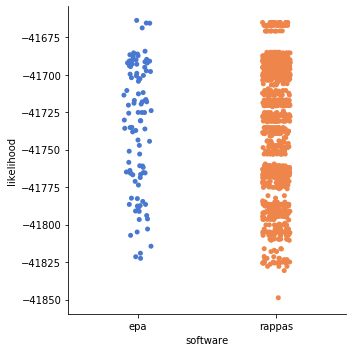

In [20]:
sns.catplot(x="software", y="likelihood", dodge=True, data=tables_all, palette="muted")

In [192]:
software_args = {
    "epa" : ["g"],
    "rappas": ["k", "o", "mu"]
}

software = "rappas"
arg_values = {}
tables_all["software run"] = ''

#tables_all

for software in tables_new["software"].unique():
    
    tables_all.loc[tables_all["software"] == software, "software run"] = '1'
    
    
    #grouped = tables_all.groupby(["query"])
    #grouped
    
    break
    #software_run_column = ''
    #for arg in software_args[software]:
    #    software_run_column += arg + "_" + tables_all[arg].astype(str)
        
    #print(software_run_column)
        
    #break

#tables_rappas
#tables_rappas.pivot(index="query", columns="k", values="likelihood")

tables_all.set_index(["software", "k", "o", "mu", "g"])

#tables_all[tables_all["software"] == software]["software run"] = "rappas 1"
#for x in grouped:
#    print(x)
#tables_all

#software_arg_values = tables_rappas[["k", "o", "mu"]].drop_duplicates()

#tables_rappas["k"].astype(str) + "_" + tables_rappas["o"].astype(str)

pruning                     query  length  \
software k   o   mu  g                                                 
epa      NaN NaN NaN 0.01        0        113S1-4-r300-0-300       0   
                     0.01        0      113S1-4-r300-300-600       0   
                     0.01        0      113S1-4-r300-600-900       0   
                     0.01        0      123B-13-F-r300-0-300       0   
                     0.01        0  123B-13-F-r300-1200-1500       0   
...                            ...                       ...     ...   
rappas   8.0 2.0 0.9 NaN         0  S001884222-r300-900-1200       0   
                     NaN         0     S002034974-r300-0-300       0   
                     NaN         0   S002034974-r300-300-600       0   
                     NaN         0   S002034974-r300-600-900       0   
                     NaN         0  S002034974-r300-900-1200       0   

                             likelihood   red     ar software run  
software k   o   mu  g                                             
epa      NaN NaN NaN 0.01 -41760.711894   NaN    NaN            1  
                     0.01 -41665.623969   NaN    NaN            1  
                     0.01 -41711.922133   NaN    NaN            1  
                     0.01 -41786.493945   NaN    NaN            1  
                     0.01 -41796.585136   NaN    NaN            1  
...                                 ...   ...    ...          ...  
rappas   8.0 2.0 0.9 NaN  -41690.766008  0.99  PHYML               
                     NaN  -41825.518627  0.99  PHYML               
                     NaN  -41772.930044  0.99  PHYML               
                     NaN  -41718.648293  0.99  PHYML               
                     NaN  -41696.253590  0.99  PHYML               

[1100 rows x 7 columns]

In [22]:
df_all = pd.concat([df_epa, df_rappas], sort=False)
df_all.head()

,length,g,likelihood,software,k,o,red,ar,mu
0,0,0.01,-41734.707198,epa,NaN,NaN,NaN,NaN,NaN
0,0,NaN,-41742.744227,rappas,8.0,2.0,0.99,PHYML,0.1
1,0,NaN,-41736.298636,rappas,10.0,2.0,0.99,PHYML,0.1
2,0,NaN,-41737.022266,rappas,8.0,2.0,0.99,PHYML,0.3
3,0,NaN,-41735.894070,rappas,10.0,2.0,0.99,PHYML,0.3


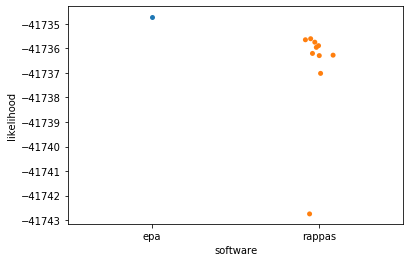

In [23]:
sns.stripplot(x="software", y="likelihood", data=df_all)

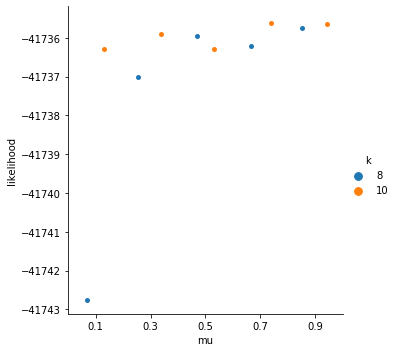

In [24]:
sns.catplot(x="mu", y="likelihood", hue="k", dodge=True, data=df_rappas)

## Max deviation filter

This function calculates the maximum deviation from the mean value.

$F(P_x) = \max_{i=0}^{n}{|p_i^x - \overline {P_x}|}$

In [26]:
workdir = "/home/nikolai/dev/datasets/d652/266_pruning/pewo_likelihood_dev"
filename = f"{workdir}/summary_table_LL_rappas2.csv"
df_rappas_maxdev = pd.read_csv(filename, sep=";")
df_rappas_maxdev["software"] = "rappas"
df_rappas_maxdev.head()

,length,k,o,red,ar,mu,likelihood,software
0,0,8,2,0.99,PHYML,0.1,-41742.913409,rappas
1,0,10,2,0.99,PHYML,0.1,-41736.014309,rappas
2,0,8,2,0.99,PHYML,0.3,-41737.022266,rappas
3,0,10,2,0.99,PHYML,0.3,-41735.894070,rappas
4,0,8,2,0.99,PHYML,0.5,-41735.962155,rappas


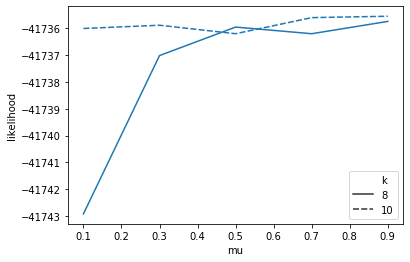

In [27]:
sns.lineplot(x="mu", y="likelihood", data=df_rappas_maxdev, style="k")

In [33]:
filename = f"{workdir}/tables_LL_rappas2.csv"
tables_rappas_dev = pd.read_csv(filename, sep=";")
tables_rappas_dev["software"] = "rappas"
tables_rappas_dev.head()

,pruning,red,ar,k,o,mu,query,length,likelihood,software
0,0,0.99,PHYML,10,2.0,0.1,113S1-4-r300-0-300,0,-41760.711894,rappas
1,0,0.99,PHYML,10,2.0,0.1,113S1-4-r300-300-600,0,-41667.159348,rappas
2,0,0.99,PHYML,10,2.0,0.1,113S1-4-r300-600-900,0,-41713.163195,rappas
3,0,0.99,PHYML,10,2.0,0.1,123B-13-F-r300-0-300,0,-41786.493945,rappas
4,0,0.99,PHYML,10,2.0,0.1,123B-13-F-r300-1200-1500,0,-41792.242213,rappas


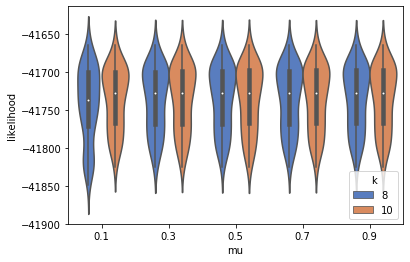

In [34]:
sns.violinplot(x="mu", y="likelihood", hue="k", data=tables_rappas_dev, palette="muted")

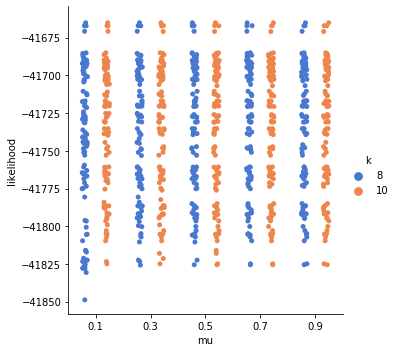

In [35]:
sns.catplot(x="mu", y="likelihood", dodge=True, hue="k", data=tables_rappas_dev, palette="muted")

In [28]:
df_all_maxdev = pd.concat([df_epa, df_rappas_maxdev], sort=False)
df_all_maxdev[:5]

,length,g,likelihood,software,k,o,red,ar,mu
0,0,0.01,-41734.707198,epa,NaN,NaN,NaN,NaN,NaN
0,0,NaN,-41742.913409,rappas,8.0,2.0,0.99,PHYML,0.1
1,0,NaN,-41736.014309,rappas,10.0,2.0,0.99,PHYML,0.1
2,0,NaN,-41737.022266,rappas,8.0,2.0,0.99,PHYML,0.3
3,0,NaN,-41735.894070,rappas,10.0,2.0,0.99,PHYML,0.3


In [40]:
tables_all = pd.concat([tables_epa, tables_rappas_dev], sort=False)
tables_all.head()

,pruning,g,query,length,likelihood,software,red,ar,k,o,mu
0,0,0.01,113S1-4-r300-0-300,0,-41760.711894,epa,NaN,NaN,NaN,NaN,NaN
1,0,0.01,113S1-4-r300-300-600,0,-41665.623969,epa,NaN,NaN,NaN,NaN,NaN
2,0,0.01,113S1-4-r300-600-900,0,-41711.922133,epa,NaN,NaN,NaN,NaN,NaN
3,0,0.01,123B-13-F-r300-0-300,0,-41786.493945,epa,NaN,NaN,NaN,NaN,NaN
4,0,0.01,123B-13-F-r300-1200-1500,0,-41796.585136,epa,NaN,NaN,NaN,NaN,NaN


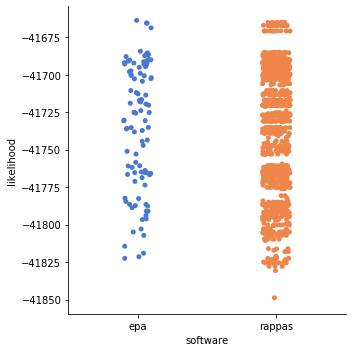

In [41]:
sns.catplot(x="software", y="likelihood", dodge=True, data=tables_all, palette="muted")

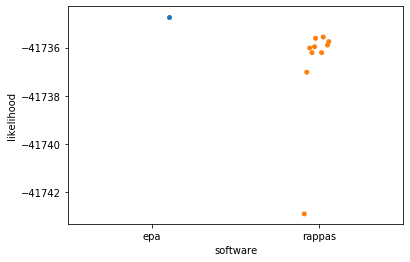

In [42]:
sns.stripplot(x="software", y="likelihood", data=df_all_maxdev)

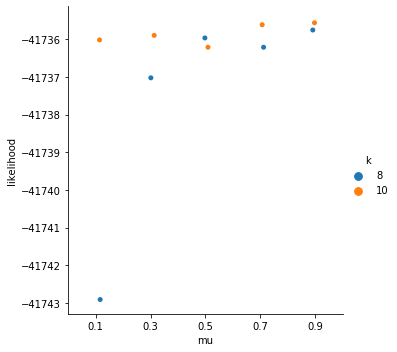

In [32]:
sns.catplot(x="mu", y="likelihood", hue="k", data=df_rappas_maxdev)